In [1]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import os
import PIL

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall


In [2]:
# Path to your hand gesture dataset
data_dir = "./Dataset"  # Update with your actual path

# Create ImageDataGenerator instances for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training and validation data
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # MobileNetV3 input size
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3600 images belonging to 5 classes.
Found 900 images belonging to 5 classes.


In [3]:
# Load MobileNetV3 model without the top classification layer
base_model = MobileNetV3Small(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model to retain pre-trained weights

# Add custom classification layers for hand gesture recognition
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)  # Adding a fully connected layer
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)  # Output layer with 5 classes (adjust according to your number of gestures)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [4]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust the number of epochs as needed
)

Epoch 1/10


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.2686 - loss: 1.6015 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5744 - val_loss: 1.4438 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - accuracy: 0.4954 - loss: 1.3866 - precision: 0.9337 - recall: 0.0013 - val_accuracy: 0.7578 - val_loss: 1.1721 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 212ms/step - accuracy: 0.6956 - loss: 1.1119 - precision: 0.9461 - recall: 0.0589 - val_accuracy: 1.0000 - val_loss: 0.8961 - val_precision: 1.0000 - val_recall: 0.0867
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 192ms/step - accuracy: 0.7675 - loss: 0.8704 - precision: 0.9406 - recall: 0.3141 - val_accuracy: 0.9967 - val_loss: 0.6839 - val_precision: 1.0000 - val_recall: 0.4967
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - accuracy: 0.8707 - loss: 0.6664 - precision: 0.9586 - recall: 0.5761 - val_acc

In [7]:
# Evaluate the model
evaluation_results = model.evaluate(val_data)

# Print the evaluation results
print(f"Validation Loss: {evaluation_results[0]:.3f}")
print(f"Validation Accuracy: {evaluation_results[1]:.3f}")
print(f"Precision: {evaluation_results[2]:.3f}")
print(f"Recall: {evaluation_results[3]:.3f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 1.0000 - loss: 0.1546 - precision: 1.0000 - recall: 1.0000
Validation Loss: 0.156
Validation Accuracy: 1.000
Precision: 1.000
Recall: 1.000


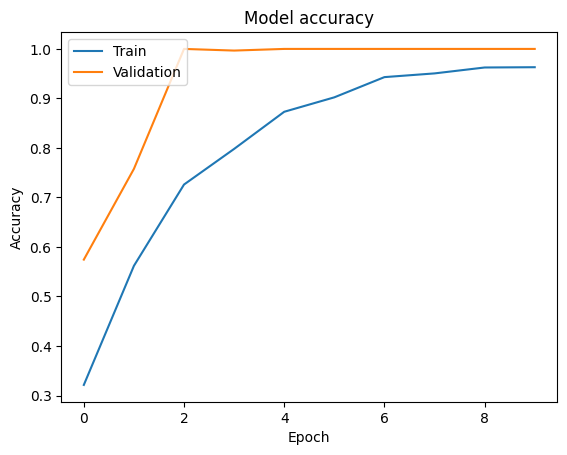

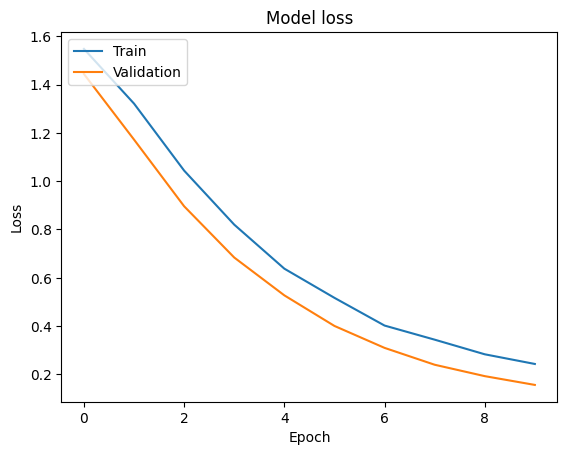

In [5]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Found 1500 images belonging to 5 classes.


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 322ms/step
F1-Score: 0.976
              precision    recall  f1-score   support

    Gesture1       1.00      1.00      1.00       300
    Gesture2       1.00      0.88      0.94       300
    Gesture3       1.00      1.00      1.00       300
    Gesture4       0.90      1.00      0.94       300
    Gesture5       1.00      1.00      1.00       300

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



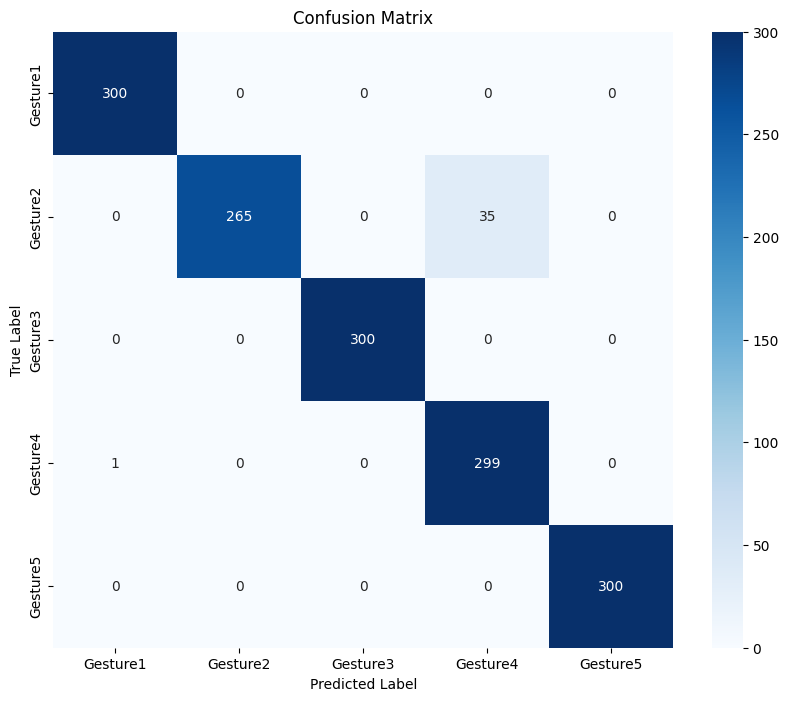

In [6]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load test data
test_data = train_datagen.flow_from_directory(
    "./test_dataset_directory",  # Update this path
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Shuffle must be False for the test dataset to match true labels with predictions
)

# Predict the classes for the test set
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = test_data.classes

# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')  # Weighted average handles class imbalance
print(f"F1-Score: {f1:.3f}")

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()